,name,total_deliveries,on_time_percentage,avg_quality_rating,avg_cost
0,Alpha Co.,2,50.0,4.5,5100.0
1,Beta Ltd.,2,100.0,3.5,4850.0
2,Gamma Inc.,2,0.0,2.5,5200.0


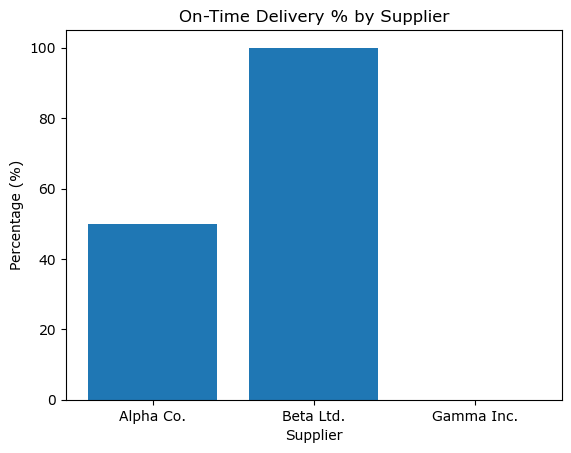

In [1]:
import sqlite3

# Connect to (or create) the database
conn = sqlite3.connect("supplier_dashboard.db")
cursor = conn.cursor()
# Create Suppliers table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Suppliers (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    region TEXT
)
''')

# Create Deliveries table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Deliveries (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    supplier_id INTEGER,
    delivery_date TEXT,
    on_time INTEGER,  -- 1 = On Time, 0 = Late
    cost REAL,
    quality_rating INTEGER,
    FOREIGN KEY (supplier_id) REFERENCES Suppliers(id)
)
''')

conn.commit()
#insert suppliers
suppliers = [
    ('Alpha Co.', 'Bangkok'),
    ('Beta Ltd.', 'Chiang Mai'),
    ('Gamma Inc.', 'Rayong')
]

cursor.executemany("INSERT INTO Suppliers (name, region) VALUES (?, ?)", suppliers)
conn.commit()

#insert deliveries
deliveries = [
    (1, '2025-06-01', 1, 5000, 5),
    (1, '2025-06-08', 0, 5200, 4),
    (2, '2025-06-02', 1, 4800, 4),
    (2, '2025-06-09', 1, 4900, 3),
    (3, '2025-06-03', 0, 5100, 2),
    (3, '2025-06-10', 0, 5300, 3)
]

cursor.executemany('''
INSERT INTO Deliveries (supplier_id, delivery_date, on_time, cost, quality_rating)
VALUES (?, ?, ?, ?, ?)
''', deliveries)

conn.commit()

#Calculate KPI
import pandas as pd

# Query to calculate metrics
query = '''
SELECT 
    s.name,
    COUNT(d.id) AS total_deliveries,
    ROUND(AVG(d.on_time) * 100, 2) AS on_time_percentage,
    ROUND(AVG(d.quality_rating), 2) AS avg_quality_rating,
    ROUND(AVG(d.cost), 2) AS avg_cost
FROM Suppliers s
LEFT JOIN Deliveries d ON s.id = d.supplier_id
GROUP BY s.id
'''

df = pd.read_sql_query(query, conn)
display(df)

#code for chart visualization
import matplotlib.pyplot as plt

# Bar chart: On-Time Delivery %
plt.bar(df['name'], df['on_time_percentage'])
plt.title("On-Time Delivery % by Supplier")
plt.ylabel("Percentage (%)")
plt.xlabel("Supplier")
plt.show()

conn.close()